<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S8_C4_Key_Collision_Cosine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## LIbrerías para PNL

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk



#Parte 1. Cargar datos

In [ ]:
from google.colab import drive # Conectanonos con google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/BIT_Bootcam_IA/DataSET'
import os    # la librería necesaria para la ruta de la carpeta
os.chdir(folder_path) # ruta de la carpeta

#mostar lista de archivos
os.listdir()

['marketing_campaign.csv',
 'marketing_campaign.xlsx',
 'marketing_extract_2X_Income.xlsx',
 'linear_regression_model (1).pkl',
 'poly_regression_model (1).pkl',
 'auto-mpg.names',
 'auto-mpg.data-original',
 'auto-mpg.data',
 'Index',
 'mpg-limpios-procesados.xlsx',
 'Classification_Tests.csv',
 'heart_attack_risk_dataset.csv',
 'generated_classification_data.csv',
 'Mall_Customers.csv',
 'Police-Crime.csv']

In [ ]:
# Reloading the file provided by the user to explore the structure for designing the notebook
file_path = 'Police-Crime.csv'
data = pd.read_csv(file_path, delimiter=';')

# Checking the structure of the data for notebook design
data.head()

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,Range,AddressType
0,160903280,Assault / Battery,2016-03-30T00:00:00,18:42,2016-03-30T18:42:00,REP,100 Block Of Chilton Av,San Francisco,CA,1,NaN,Premise Address
1,160912272,Homeless Complaint,2016-03-31T00:00:00,15:31,2016-03-31T15:31:00,GOA,2300 Block Of Market St,San Francisco,CA,1,NaN,Premise Address
2,160912590,Susp Info,2016-03-31T00:00:00,16:49,2016-03-31T16:49:00,GOA,2300 Block Of Market St,San Francisco,CA,1,NaN,Premise Address
3,160912801,Report,2016-03-31T00:00:00,17:38,2016-03-31T17:38:00,GOA,500 Block Of 7th St,San Francisco,CA,1,NaN,Premise Address
4,160912811,594,2016-03-31T00:00:00,17:42,2016-03-31T17:42:00,REP,Beale St/bryant St,San Francisco,CA,1,NaN,Intersection


# Exploracion de los datos

In [ ]:
data['OriginalCrimeTypeName'].unique()

array(['Assault / Battery', 'Homeless Complaint', 'Susp Info', 'Report',
       '594', "Ref'd", 'Agg Assault / Adw Dv', 'Encampment', 'Burglary',
       'Suspicious Person', 'Ip', 'Arrest Made', 'Tent',
       'Intoxicated Person', 'Guitar', 'H&r Veh Accident', 'Music',
       'Person Dumping', 'Vandalism', 'Petty Theft', '415',
       'Noise Nuisance', 'Fraud', 'Rep', 'Meet W/citizen',
       'Prisoner Transport', 'Poss', 'Trespasser', 'Stolen Vehicle',
       'Fight No Weapon', 'Check For Ped', 'Juvenile Disturbance',
       'Party', 'Lltd', 'Robbery', '601', '500e', '913', 'Traffic Stop',
       '909', 'Person W/gun', 'Suspicious Vehicle', 'Fight No Weapon Dv',
       'Audible Alarm', 'Parking', 'Pay', 'Silent Holdup Alarm',
       'Passing Call', 'Sleeper', 'Family', 'Thumping', 'Loud Music',
       '916', 'Att', 'Threats / Harassment', 'Boombox',
       'Traf Violation Tow', 'Dw', 'Bar Check', 'Suicide Attempt', 'Susp',
       'Crosswalk', 'Casing/917', 'Wireless-Drop', 'Uc Hastin

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CrimeId                10051 non-null  int64  
 1   OriginalCrimeTypeName  10051 non-null  object 
 2   OffenseDate            10051 non-null  object 
 3   CallTime               10051 non-null  object 
 4   CallDateTime           10051 non-null  object 
 5   Disposition            10051 non-null  object 
 6   Address                10051 non-null  object 
 7   City                   9730 non-null   object 
 8   State                  10048 non-null  object 
 9   AgencyId               10051 non-null  object 
 10  Range                  0 non-null      float64
 11  AddressType            10051 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 942.4+ KB


# Parte 2. Preprocesamiento del texto

In [ ]:
# Descargar stopwords de NLTK
# Serie de palabras que no tienen relevancia en el analisis (conectores)
    # En este caso al idioma inglés
nltk.download('stopwords')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
crime_type = data['OriginalCrimeTypeName'].dropna().unique()

In [ ]:
"""
def preprocess_text(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    # Eliminar signos de puntuación
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text
"""

"\ndef preprocess_text(text):\n    # Convertir el texto a minúsculas\n    text = text.lower()\n    # Eliminar signos de puntuación\n    text = ''.join([char for char in text if char.isalnum() or char.isspace()])\n    # Eliminar stopwords\n    stop_words = set(stopwords.words('english'))\n    text = ' '.join([word for word in text.split() if word not in stop_words])\n    return text\n"

In [ ]:

# Preprocesar texto
def preprocess_text(text):
   #Preprocesa el texto eliminando stopwords y convirtiendo a minúsculas.
    stops = set(stopwords.words('english'))
    text = text.lower()
    return ' '.join([word for word in text.split() if word not in stops])


In [ ]:
# Operacion For incrementador in rango (En donde recorre)
crime_type_preprocessed = [preprocess_text(text) for text in crime_type]

In [ ]:
vectorizer = TfidfVectorizer()
crime_time_vectorizer = vectorizer.fit_transform(crime_type_preprocessed)

In [ ]:
crime_time_vectorizer.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(crime_time_vectorizer.toarray(), columns=vectorizer.get_feature_names_out()).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Columns: 496 entries, 0123 to zone
dtypes: float64(496)
memory usage: 2.2 MB


# PARTE 3. Agrupamiento

In [ ]:
# Encontrar el número óptimo de clústeres usando el método del codo
def find_optimal_clusters(crime_time_vectorizer, max_k):
    inertias = []
    sil_scores = []
    for k in range(2, max_k + 1):
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(crime_time_vectorizer)
        inertias.append(model.inertia_)
        sil_scores.append(silhouette_score(crime_time_vectorizer, model.labels_))
    return inertias, sil_scores


In [ ]:
max_k =20
inertias, sil_scores = find_optimal_clusters(crime_time_vectorizer, max_k)

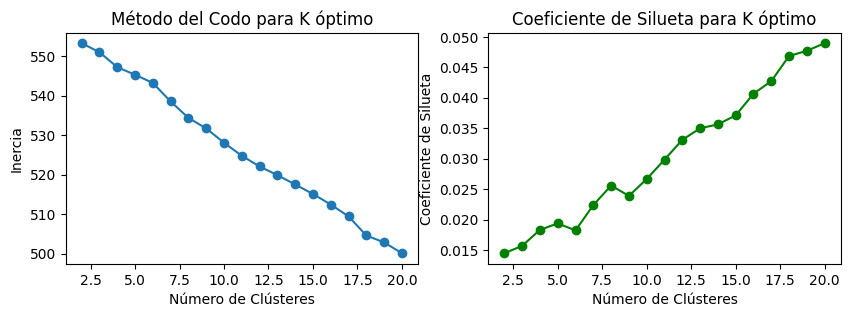

In [ ]:
# Visualizar el método del codo
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_k + 1), inertias, marker='o')
plt.title('Método del Codo para K óptimo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.subplot(1, 2, 2)
plt.plot(range(2, max_k + 1), sil_scores, marker='o', color='green')
plt.title('Coeficiente de Silueta para K óptimo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.show()

# PARTE 3.1 Ajuste del modelo

In [ ]:
n_clusters=20
kmeans = KMeans(n_clusters = n_clusters, random_state=42)
kmeans.fit(crime_time_vectorizer)

KMeans(n_clusters=20, random_state=42)

In [ ]:
Cluster = kmeans.labels_
crime_type_cluster = pd.DataFrame({'CrimeType': crime_type, 'Cluster': Cluster})
crime_type_cluster.head(5)

,CrimeType,Cluster
0,Assault / Battery,16
1,Homeless Complaint,1
2,Susp Info,1
3,Report,18
4,594,1


In [ ]:
# Mostrar los cluster, es decir los terminos agrupados

for cluster in range(n_clusters):
    print(f"Cluster {cluster}:")

    print(crime_type_cluster[crime_type_cluster['Cluster'] == cluster]['CrimeType'].tolist())


Cluster 0:
['Poss 5150', '5150', '5150 Poss', '5150 Hold Poss']
Cluster 1:
['Homeless Complaint', 'Susp Info', '594', "Ref'd", 'Encampment', 'Burglary', 'Ip', 'Tent', 'Guitar', 'Music', 'Vandalism', 'Petty Theft', '415', 'Noise Nuisance', 'Fraud', 'Rep', 'Meet W/citizen', 'Prisoner Transport', 'Trespasser', 'Stolen Vehicle', 'Fight No Weapon', 'Check For Ped', 'Juvenile Disturbance', 'Party', 'Lltd', 'Robbery', '601', '500e', '913', 'Traffic Stop', '909', 'Suspicious Vehicle', 'Fight No Weapon Dv', 'Parking', 'Pay', 'Passing Call', 'Family', 'Thumping', '916', 'Att', 'Threats / Harassment', 'Boombox', 'Bar Check', 'Suicide Attempt', 'Susp', 'Crosswalk', 'Casing/917', 'Wireless-Drop', 'Uc Hastings/405', 'Bomb Threat', 'Mentally Disturbed', 'Complaint Unkn', '811', 'Casing', 'Prowler', 'Shots Fired', 'Shooting', '919', '417', 'Well Being Check', '917', '917/811', 'Wanted Vehicle / Sub', 'Ug', 'Hold-Up', '531', 'Fare', 'Construction', 'Drugs', 'Campers', 'X', 'Return', 'Rtl', 'Verbal', '5

# PARTE 4. Similitud semántica aplicando coseno (Key collision)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Manejo de key collision usando similitud de coseno
def detect_collisions(clustered_df, vectorized_data):
    """Detecta términos similares dentro de un mismo clúster."""
    collision_results = []
    for cluster_id in clustered_df['Cluster'].unique():
        cluster_items = clustered_df[clustered_df['Cluster'] == cluster_id]
        indices = cluster_items.index.tolist()
        cluster_vectors = vectorized_data[indices]

        # Calcular similitudes dentro del clúster
        sim_matrix = cosine_similarity(cluster_vectors)

        # Detectar términos con baja similitud
        for i, row in enumerate(sim_matrix):
            for j, sim_score in enumerate(row):
                if i != j and sim_score < 0.5:  # Ajustar umbral según necesidad
                    collision_results.append({
                        'Cluster': cluster_id,
                        'Term1': cluster_items.iloc[i]['CrimeType'],
                        'Term2': cluster_items.iloc[j]['CrimeType'],
                        'Similarity': sim_score
                    })
    return pd.DataFrame(collision_results)

# Detectar colisiones
collision_results = detect_collisions(crime_type_cluster, crime_time_vectorizer)
collision_results.sort_values(by='Similarity', ascending=True)

,Cluster,Term1,Term2,Similarity
97660,1,Taxi Zone,W/a Hammer,0.000000
129100,1,Neighbors,Dogs Barking,0.000000
129101,1,Neighbors,Panhandler W/pitbull,0.000000
129102,1,Neighbors,Video Surveillence,0.000000
129103,1,Neighbors,H/r,0.000000
...,...,...,...,...
195293,9,22500e/rz,Dw/rz,0.498736
128504,1,Vandalism Dv,Graffiti Vandalism,0.499989
17796,1,Threats / Harassment,Threats Dv,0.499989
94921,1,Threats Dv,Threats / Harassment,0.499989
